<a href="https://colab.research.google.com/github/bbash/ArewaDS-Deep-Learning/blob/main/week_3_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0

### Name: Bashir Salisu Abubakar

### Email: bsalisu2016@gmail.com

### Title: Week 3 Solution

### **Exercises Solution**

In [68]:
# Import torch
import torch

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'The device is: {device}')

# Setup random seed
RANDOM_SEED = 42

The device is: cuda


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [69]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

X, y = make_moons(1000,
                  noise=0.05,
                  random_state=42)

#checking the shape
print(X.shape, y.shape)

print('The first five values of X and y')
X[:5], y[:5]

(1000, 2) (1000,)
The first five values of X and y


(array([[-0.02137124,  0.40618608],
        [ 0.97670045, -0.45832306],
        [ 0.90405882, -0.37651952],
        [ 0.37736316, -0.39703717],
        [-0.84192557,  0.53058695]]),
 array([1, 1, 1, 1, 0]))

In [70]:
# Turn data into a DataFrame
import pandas as pd
inputs = {'X1':X[:,0], 'x2':X[:,1], 'target':y[:] }
data = pd.DataFrame(inputs)
data.head(10)

,X1,x2,target
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0
5,0.589303,-0.321376,1
6,0.292487,-0.206963,1
7,-0.026378,0.447663,1
8,1.620141,-0.287589,1
9,0.682467,0.807121,0


In [71]:
# count the number of class
data.target.value_counts()

# since the values are two: 1 and 0, we can categorically say the problem is a binary classification problem

1    500
0    500
Name: target, dtype: int64

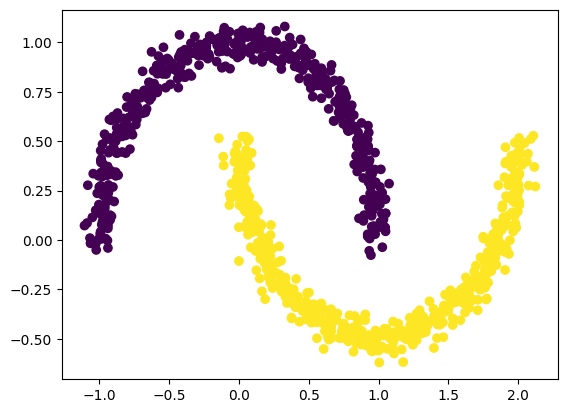

In [72]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y)

In [73]:
# Turn data into tensors of dtype float
X_tensor = torch.from_numpy(X).type(torch.float)
y_tensor = torch.from_numpy(y).type(torch.float)

#checking the data type of X_tensor and y_tensor
print(f'The data types of X_tensor: {X_tensor.type()} and y_tensor: {y_tensor.type()}')

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X_tensor, y_tensor,
                                                   train_size=0.8,
                                                   random_state=42)
print()
#checking the shape and len
print(f'X_train: {len(X_train)}, y_train {len(y_train)} X_test: {len(X_test)}, y_test: {len(y_test)} ')
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}' )


The data types of X_tensor: torch.FloatTensor and y_tensor: torch.FloatTensor

X_train: 800, y_train 800 X_test: 200, y_test: 200 
X_train: torch.Size([800, 2]), y_train: torch.Size([800]), X_test: torch.Size([200, 2]), y_test: torch.Size([200])


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [74]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2, out_features=8)
        self.layer_2 = nn.Linear(in_features=8, out_features=8)
        self.layer_3 = nn.Linear(in_features=8, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        ## Your code here ##
        return  self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# Instantiate the model
## Your code here ##
torch.manual_seed(42)
moon_model = MoonModelV0().to(device)
moon_model

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [75]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params= moon_model.parameters(), lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [76]:
# What's coming out of our model?
logits = moon_model(X_train.to(device))[:5]
# logits (raw outputs of model)
print("Logits:", logits)
## Your code here ##
y_prob = torch.sigmoid(logits)
# Prediction probabilities
print("Pred probs:", y_prob)
## Your code here ##
yhat = torch.round(y_prob)
# Prediction labels
print("Pred labels:", yhat)
## Your code here ##
y_test[:5]

Logits: tensor([[-0.3735],
        [-0.0689],
        [-0.1070],
        [-0.1045],
        [-0.0971]], device='cuda:0', grad_fn=<SliceBackward0>)
Pred probs: tensor([[0.4077],
        [0.4828],
        [0.4733],
        [0.4739],
        [0.4758]], device='cuda:0', grad_fn=<SigmoidBackward0>)
Pred labels: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)


tensor([1., 0., 1., 0., 1.])

In [77]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [78]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_train = X_train.to(device)
X_test  = X_test.to(device)
y_train = y_train.to(device)
y_test  = y_test.to(device)


# Loop through the data
for epoch in range(epochs):
  ### Training
  moon_model.train()


  # 1. Forward pass (logits output)
  logits = moon_model(X_train).squeeze()

  # Turn logits into prediction probabilities
  y_prob = torch.sigmoid(logits)

  # Turn prediction probabilities into prediction labels
  yhat = torch.round(y_prob)

  # 2. Calculaute the loss
  loss = loss_fn(logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(yhat, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  moon_model.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logit = moon_model(X_test).squeeze()

    # Turn the test logits into prediction labels
    test_yhat = torch.round(torch.sigmoid(test_logit))

    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logit, y_test)
    test_acc = acc_fn(test_yhat, y_test.int())


  # Print out what's happening every 100 epochs
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.71199, Accuracy: 0.50% | Test loss: 0.70546, Test acc: 0.50%
Epoch: 10 | Loss: 0.69026, Accuracy: 0.60% | Test loss: 0.68806, Test acc: 0.63%
Epoch: 20 | Loss: 0.67918, Accuracy: 0.80% | Test loss: 0.67868, Test acc: 0.84%
Epoch: 30 | Loss: 0.66632, Accuracy: 0.84% | Test loss: 0.66685, Test acc: 0.83%
Epoch: 40 | Loss: 0.64691, Accuracy: 0.82% | Test loss: 0.64857, Test acc: 0.81%
Epoch: 50 | Loss: 0.61761, Accuracy: 0.82% | Test loss: 0.62093, Test acc: 0.80%
Epoch: 60 | Loss: 0.57575, Accuracy: 0.82% | Test loss: 0.58123, Test acc: 0.80%
Epoch: 70 | Loss: 0.52120, Accuracy: 0.82% | Test loss: 0.52944, Test acc: 0.81%
Epoch: 80 | Loss: 0.46093, Accuracy: 0.83% | Test loss: 0.47158, Test acc: 0.82%
Epoch: 90 | Loss: 0.40539, Accuracy: 0.84% | Test loss: 0.41773, Test acc: 0.82%
Epoch: 100 | Loss: 0.36222, Accuracy: 0.85% | Test loss: 0.37499, Test acc: 0.83%
Epoch: 110 | Loss: 0.33098, Accuracy: 0.85% | Test loss: 0.34307, Test acc: 0.85%
Epoch: 120 | Loss: 0.30831,

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [79]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

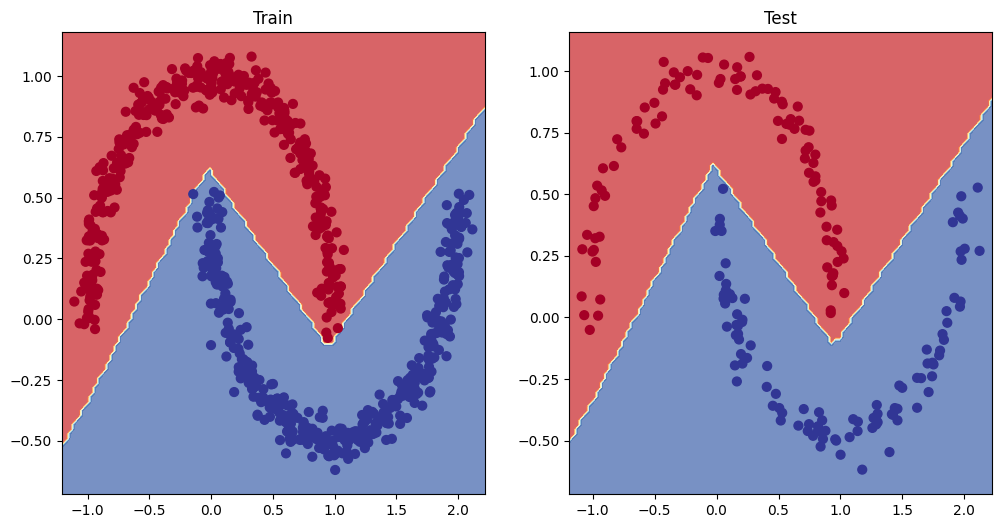

In [80]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moon_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moon_model, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

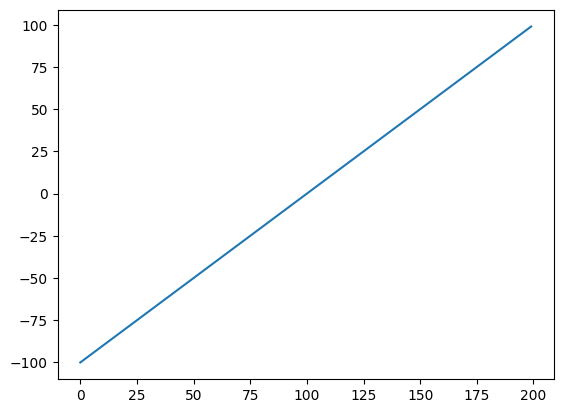

In [81]:
# Create a straight line tensor
linear_tensor = torch.arange(-100, 100, 1)
plt.plot(linear_tensor)

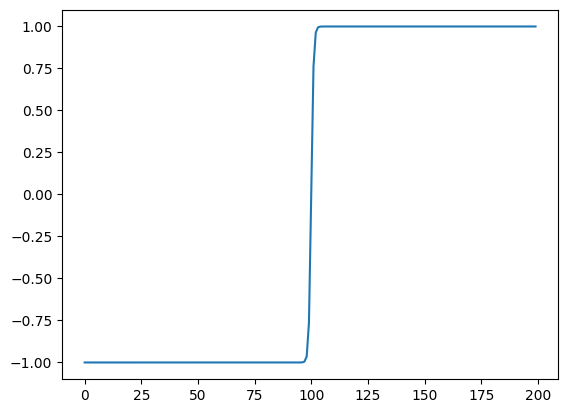

In [82]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(linear_tensor))

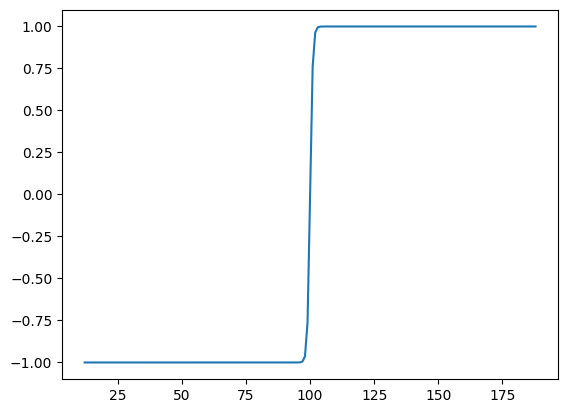

In [83]:
# Replicate torch.tanh() and plot it

def tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

plt.plot(tanh(linear_tensor))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

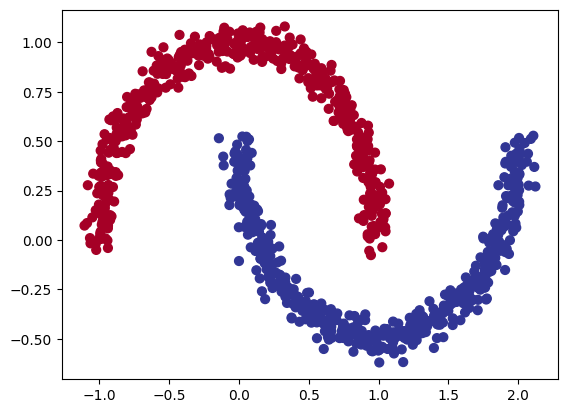

In [84]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
XX = np.zeros((N*K,D)) # data matrix (each row = single example)
yy = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  XX[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  yy[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [85]:
# Turn data into tensors
import torch
X = torch.from_numpy(XX).type(torch.float) # features as float32
y = torch.from_numpy(yy).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state = 42)
len(X_train), len(y_train), len(X_test), len(y_test)
X_train[:5], y_train[:5]

(tensor([[ 0.0396, -0.3208],
         [ 0.3179, -0.5041],
         [ 0.0321,  0.0514],
         [ 0.8259,  0.2347],
         [ 0.4942,  0.5472]]),
 tensor([2, 0, 0, 1, 1]))

In [86]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [87]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

in_features = 2
hidden = 8
out_features = 3

# Create model by subclassing nn.Module
class Spirals(nn.Module):

    def __init__(self, in_features, out_features, hidden):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=in_features, out_features=hidden)
        self.layer_2 = nn.Linear(in_features=hidden, out_features=hidden)
        self.layer_3 = nn.Linear(in_features=hidden, out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# Instantiate model and send it to device
spiral_model = Spirals(in_features, out_features, hidden).to(device)
spiral_model

Spirals(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=3, bias=True)
  (relu): ReLU()
)

In [88]:
# Setup data to be device agnostic
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##
logits = spiral_model(X_train.to(device))
print(logits[:10])

print("Pred probs:")
## Your code here ##
y_pred = torch.softmax(logits[:10], dim=1)
print(y_pred)

print("Pred labels:")
## Your code here ##
yhat = torch.softmax(logits, dim=1).argmax(dim=1)
print(yhat[:10])

Logits:
tensor([[-0.0620, -0.3527, -0.2153],
        [-0.0690, -0.3463, -0.2262],
        [-0.0746, -0.3872, -0.2516],
        [-0.2075, -0.3709, -0.4343],
        [-0.1552, -0.4035, -0.3753],
        [-0.1090, -0.3818, -0.2977],
        [-0.0938, -0.3901, -0.2801],
        [-0.0447, -0.3166, -0.1868],
        [-0.1124, -0.3449, -0.2855],
        [-0.2093, -0.3717, -0.4374]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.3838, 0.2870, 0.3292],
        [0.3828, 0.2901, 0.3271],
        [0.3892, 0.2847, 0.3261],
        [0.3779, 0.3209, 0.3012],
        [0.3872, 0.3021, 0.3107],
        [0.3862, 0.2940, 0.3198],
        [0.3886, 0.2889, 0.3225],
        [0.3803, 0.2898, 0.3299],
        [0.3797, 0.3009, 0.3194],
        [0.3779, 0.3212, 0.3008]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


In [89]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(spiral_model.parameters(),
                             lr=0.01)

In [90]:
# Build a training loop for the model
# Send data to the device
X_train = X_train.to(device)
X_test  = X_test.to(device)
y_train = y_train.to(device)
y_test  = y_test.to(device)

epochs = 1000

# Loop over data
for epoch in range(epochs):

  ## Training
  spiral_model.train()

  # 1. Forward pass
  logits = spiral_model(X_train)
  y_pred = torch.softmax(logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(logits, y_train)
  acc = acc_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()


  # 4. Loss backward
  loss.backward()


  # 5. Optimizer step
  optimizer.step()


  ## Testing
  spiral_model.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logit = spiral_model(X_test)
    test_pred = torch.softmax(test_logit, dim=1).argmax(dim=1)

    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logit, y_test)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 | Loss: 1.10 Acc: 0.32 | Test loss: 1.08 Test acc: 0.37
Epoch: 100 | Loss: 0.45 Acc: 0.78 | Test loss: 0.43 Test acc: 0.82
Epoch: 200 | Loss: 0.14 Acc: 0.95 | Test loss: 0.13 Test acc: 0.97
Epoch: 300 | Loss: 0.09 Acc: 0.97 | Test loss: 0.06 Test acc: 1.00
Epoch: 400 | Loss: 0.06 Acc: 0.98 | Test loss: 0.03 Test acc: 1.00
Epoch: 500 | Loss: 0.05 Acc: 0.99 | Test loss: 0.03 Test acc: 1.00
Epoch: 600 | Loss: 0.04 Acc: 0.99 | Test loss: 0.02 Test acc: 1.00
Epoch: 700 | Loss: 0.04 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 800 | Loss: 0.03 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 900 | Loss: 0.03 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00


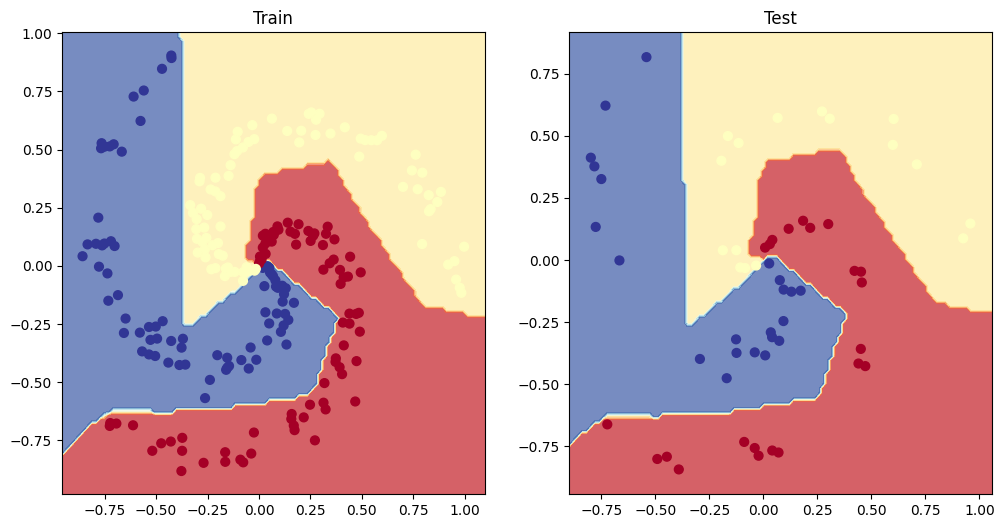

In [93]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(spiral_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(spiral_model, X_test, y_test)
